#### Dataset EDA

* Videos
    * num: 45
    * frame sample rate: 6
* Segmentation
    * num of masks: 13324
    * num class (w/ bg): 10
```json
{
    "Tool clasper": 1,
    "Tool wrist": 2,
    "Tool shaft": 3,
    "Suturing needle": 4,
    "Thread": 5,
    "Suction tool": 6,
    "Needle Holder": 7,
    "Clamps": 8,
    "Catheter": 9
}
```
    
* Action:
    * num class: 8

        ```txt
        0 Other
        1 Picking-up the needle
        2 Positioning the needle tip
        3 Pushing the needle through the tissue
        4 Pulling the needle out of the tissue
        5 Tying a knot
        6 Cutting the suture
        7 Returning/dropping the needle
        ```

    * label format: action_discrete.txt
        ```txt
        000000000,0
        000000006,0
        000000012,0
        000000018,0
        000000024,0
        000000030,0
        000000036,0
        000000042,0
        ```

In [1]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os

In [2]:
DATASET_ROOT_DIR = "../train*/video*"
video_dirs = glob(DATASET_ROOT_DIR)
len(video_dirs)

45

In [3]:
# '../train1/video_10/segmentation/000000000.png'
DATASET_DIR = '../*/*/segmentation/*.png'

In [4]:
mask_paths = glob(DATASET_DIR)
len(mask_paths)

13324

In [5]:
def check_img_mask_pair(mask_paths):
    for p in tqdm(mask_paths):
        frame_path = p.replace('segmentation', 'rgb')
        if not os.path.exists(frame_path):
            print(p, frame_path)
        
# check_img_mask_pair(mask_paths)

In [6]:
def path_change(p):
    return p.replace('segmentation', 'rgb')

#### Visualization

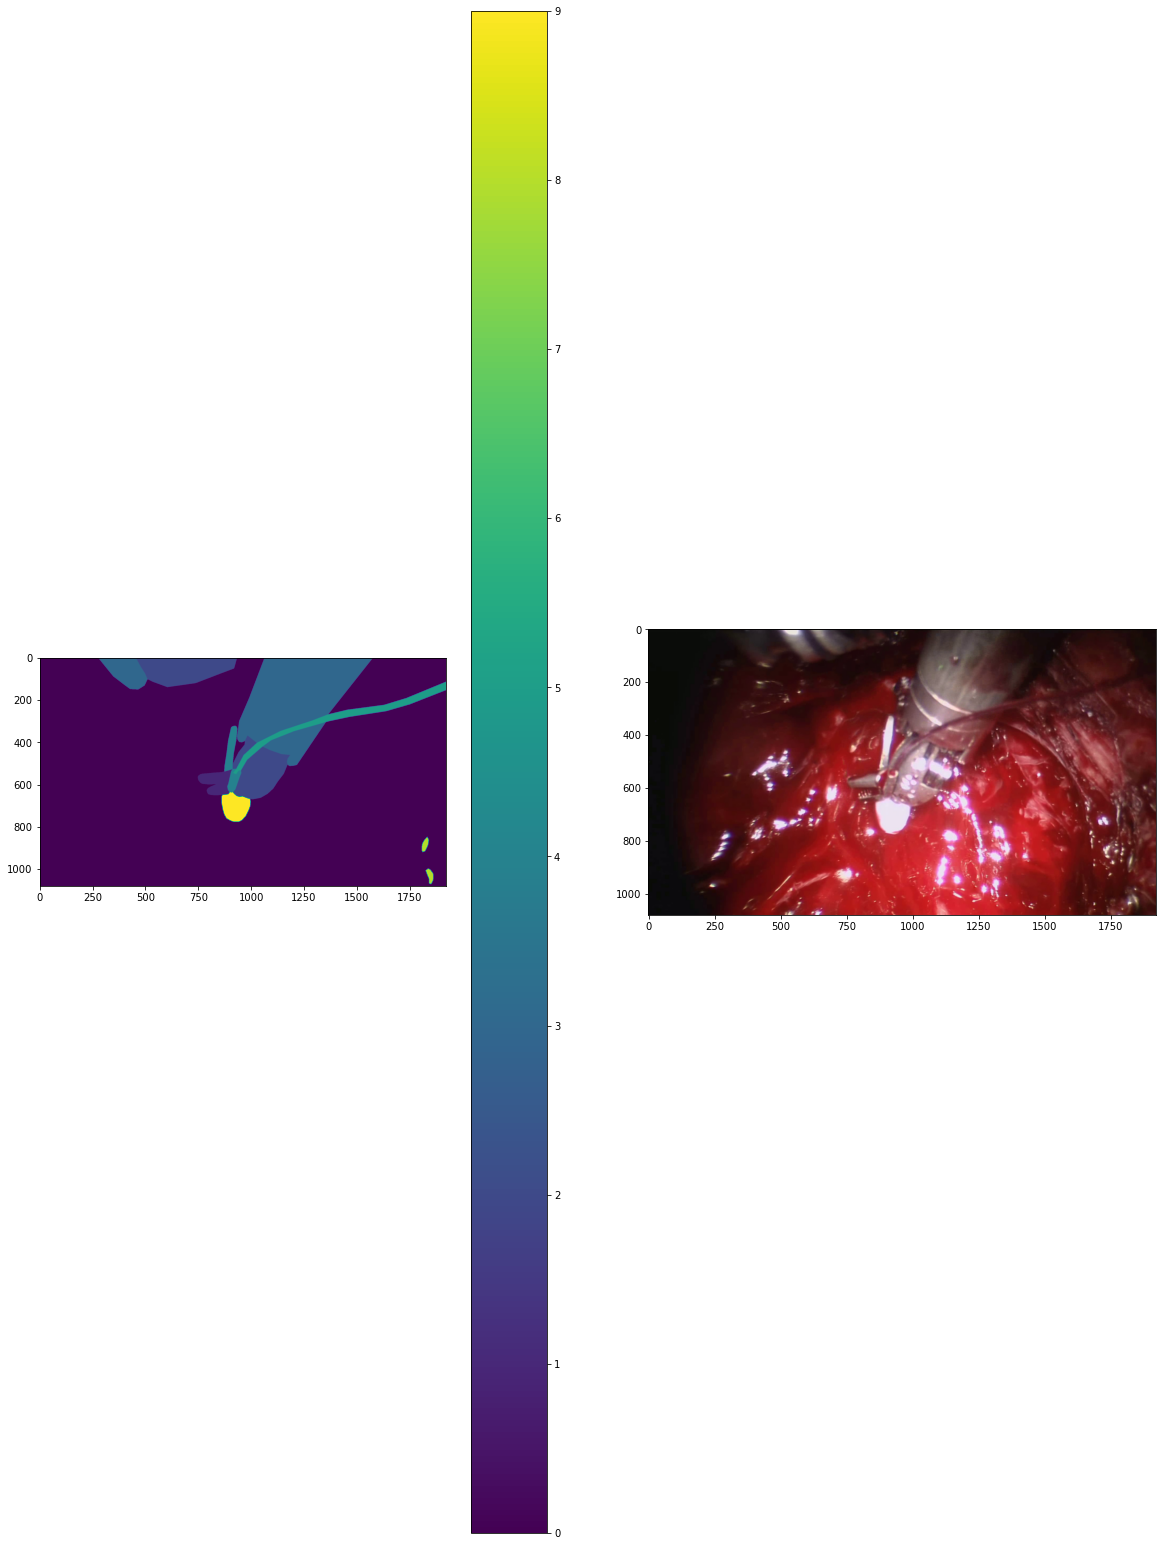

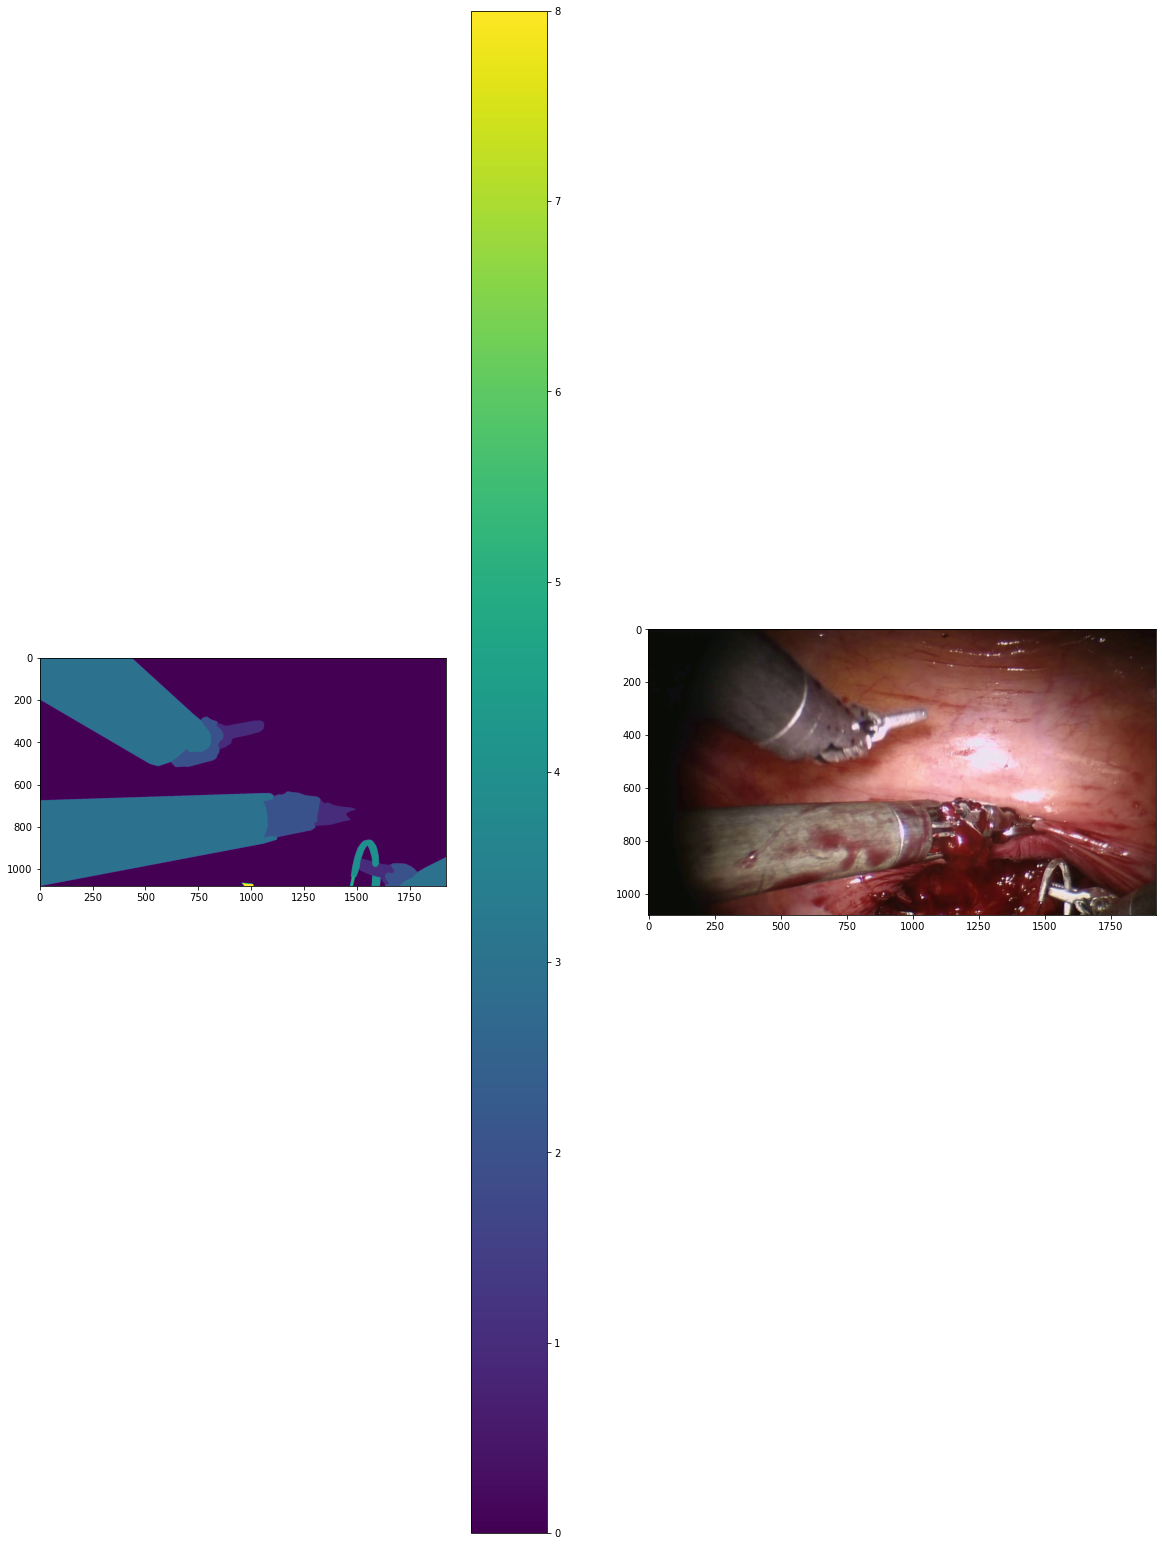

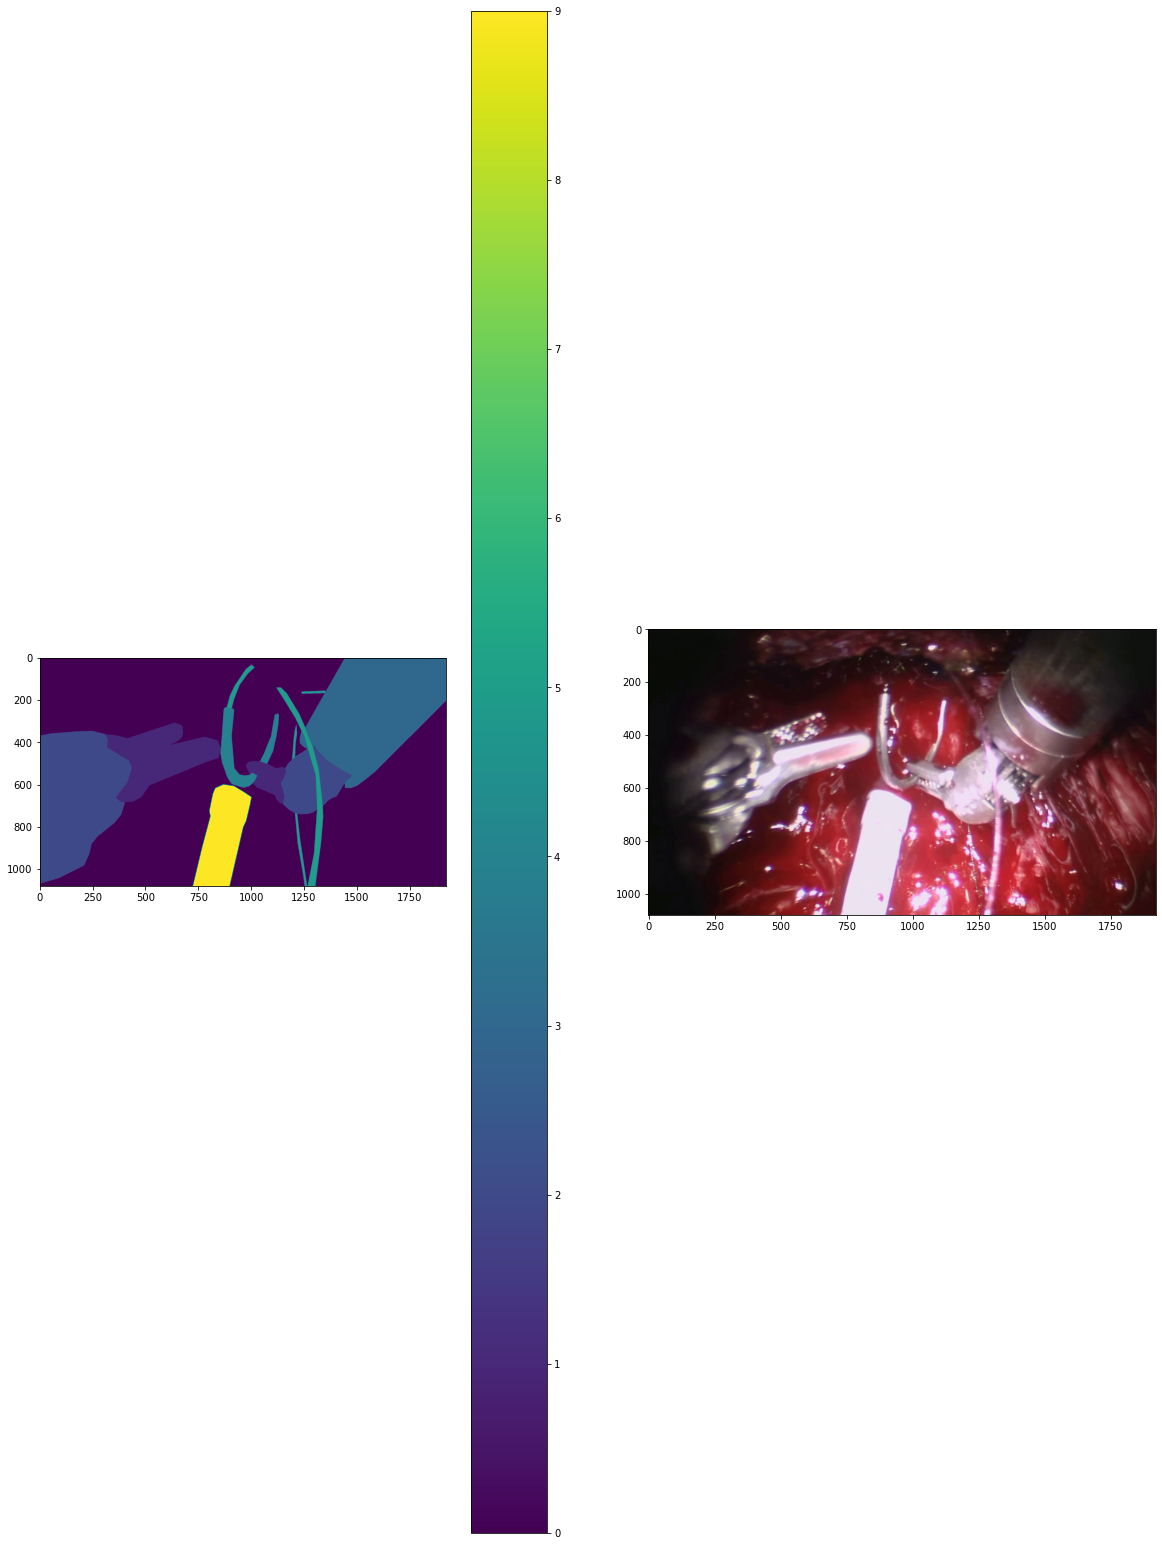

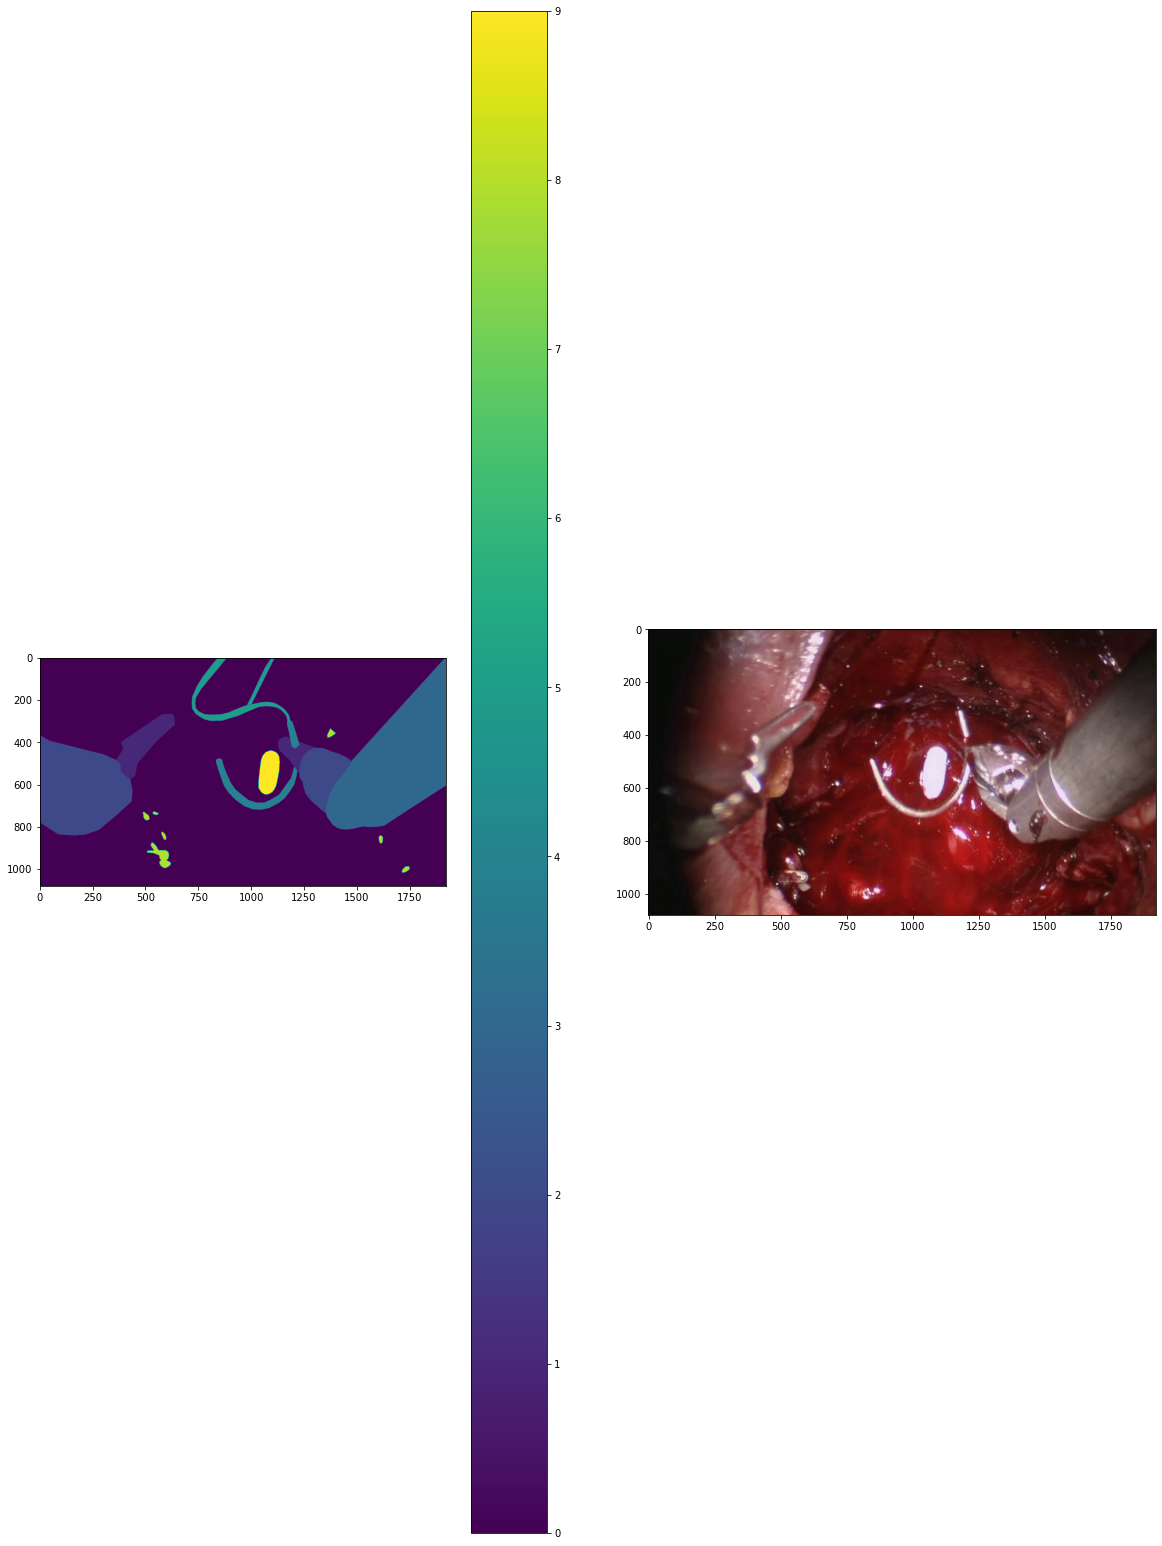

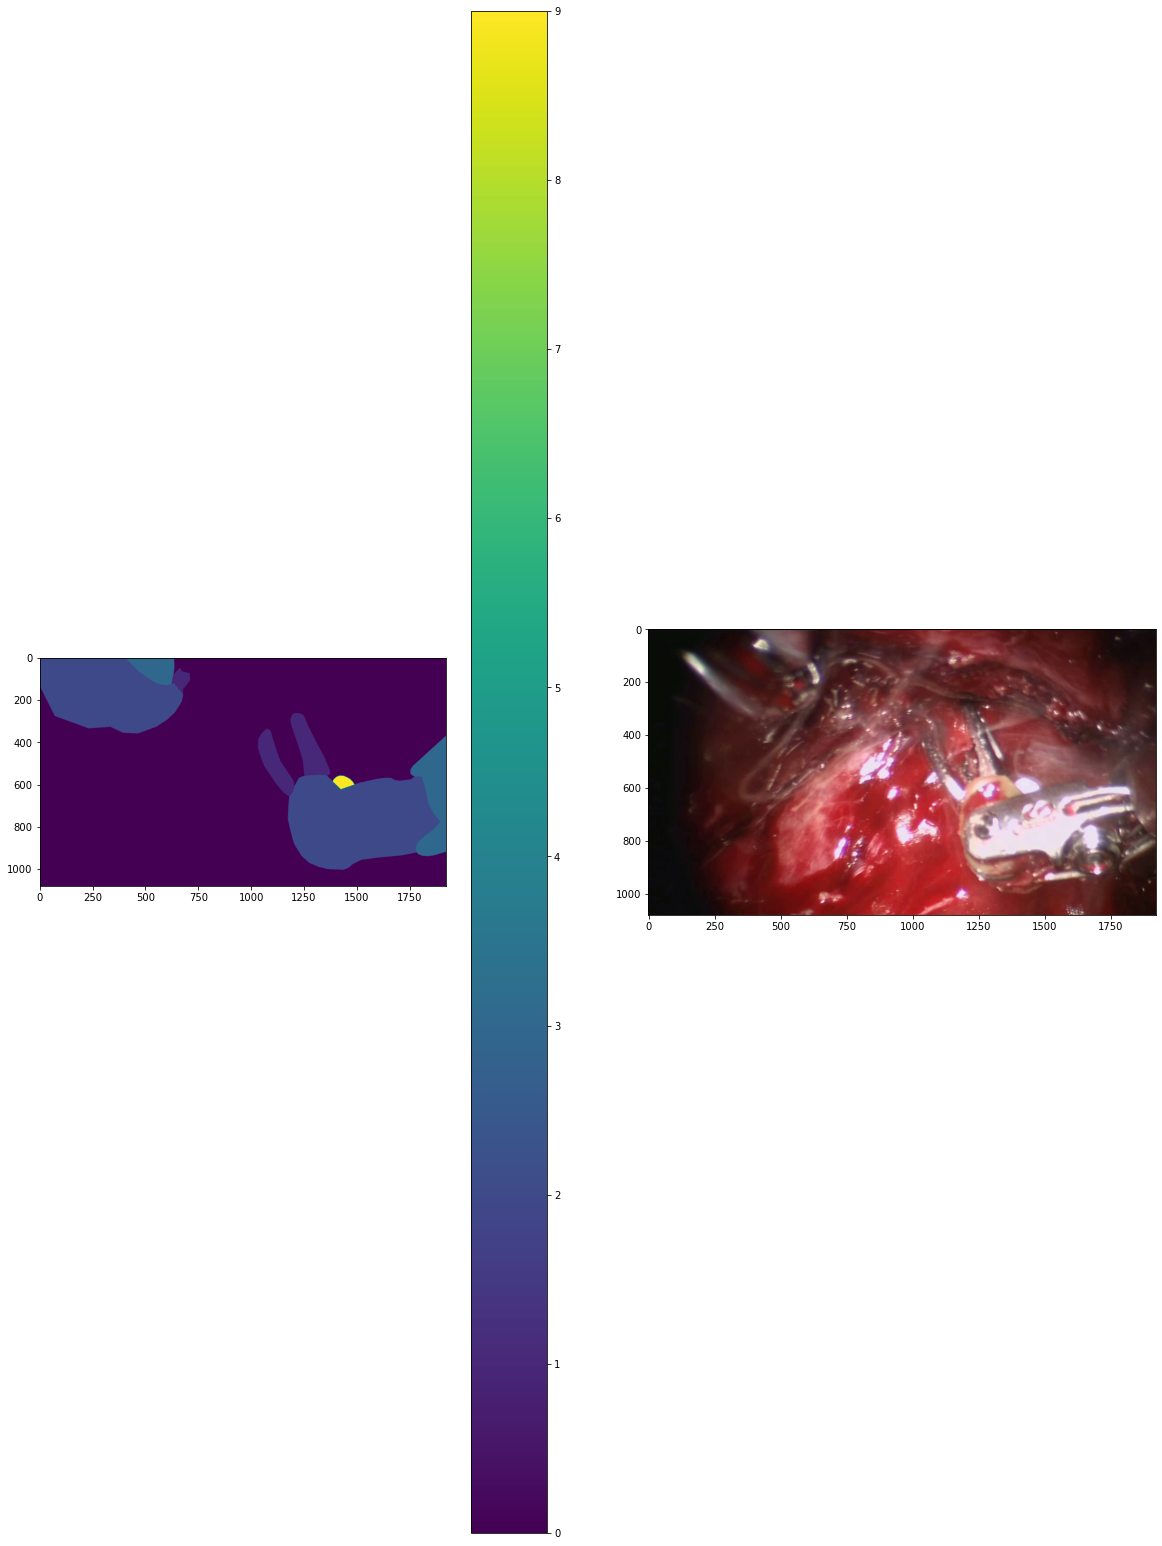

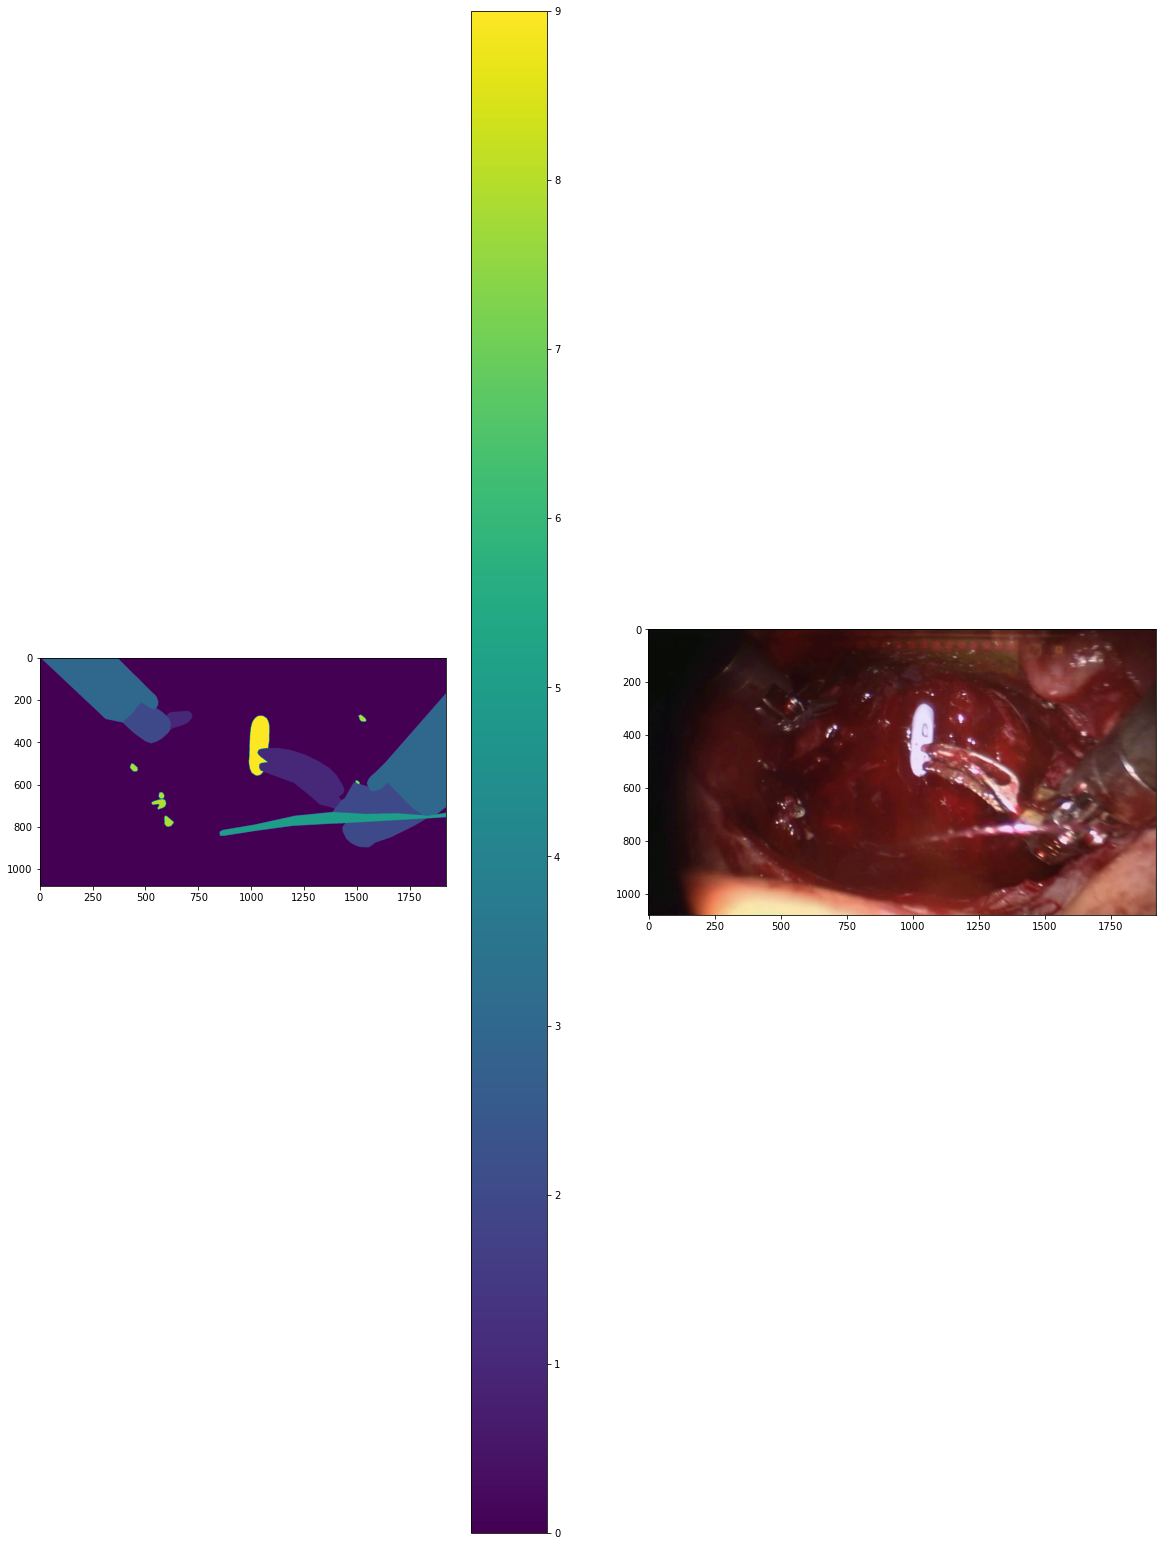

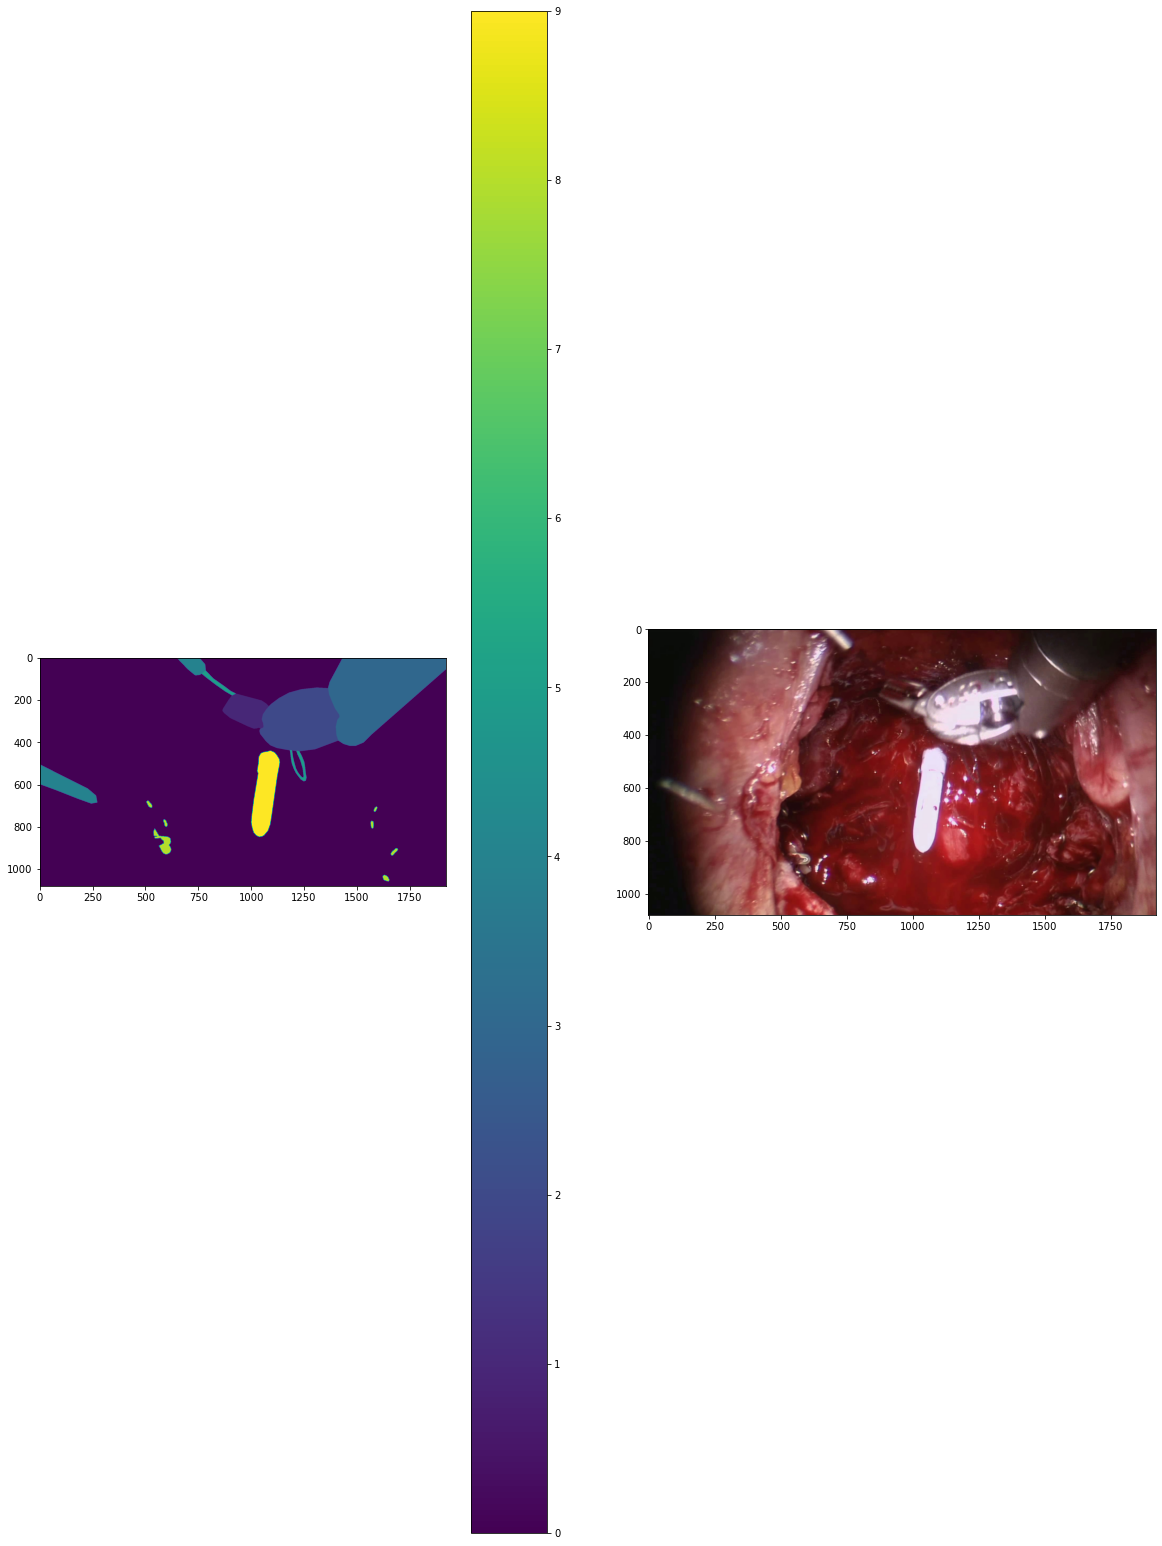

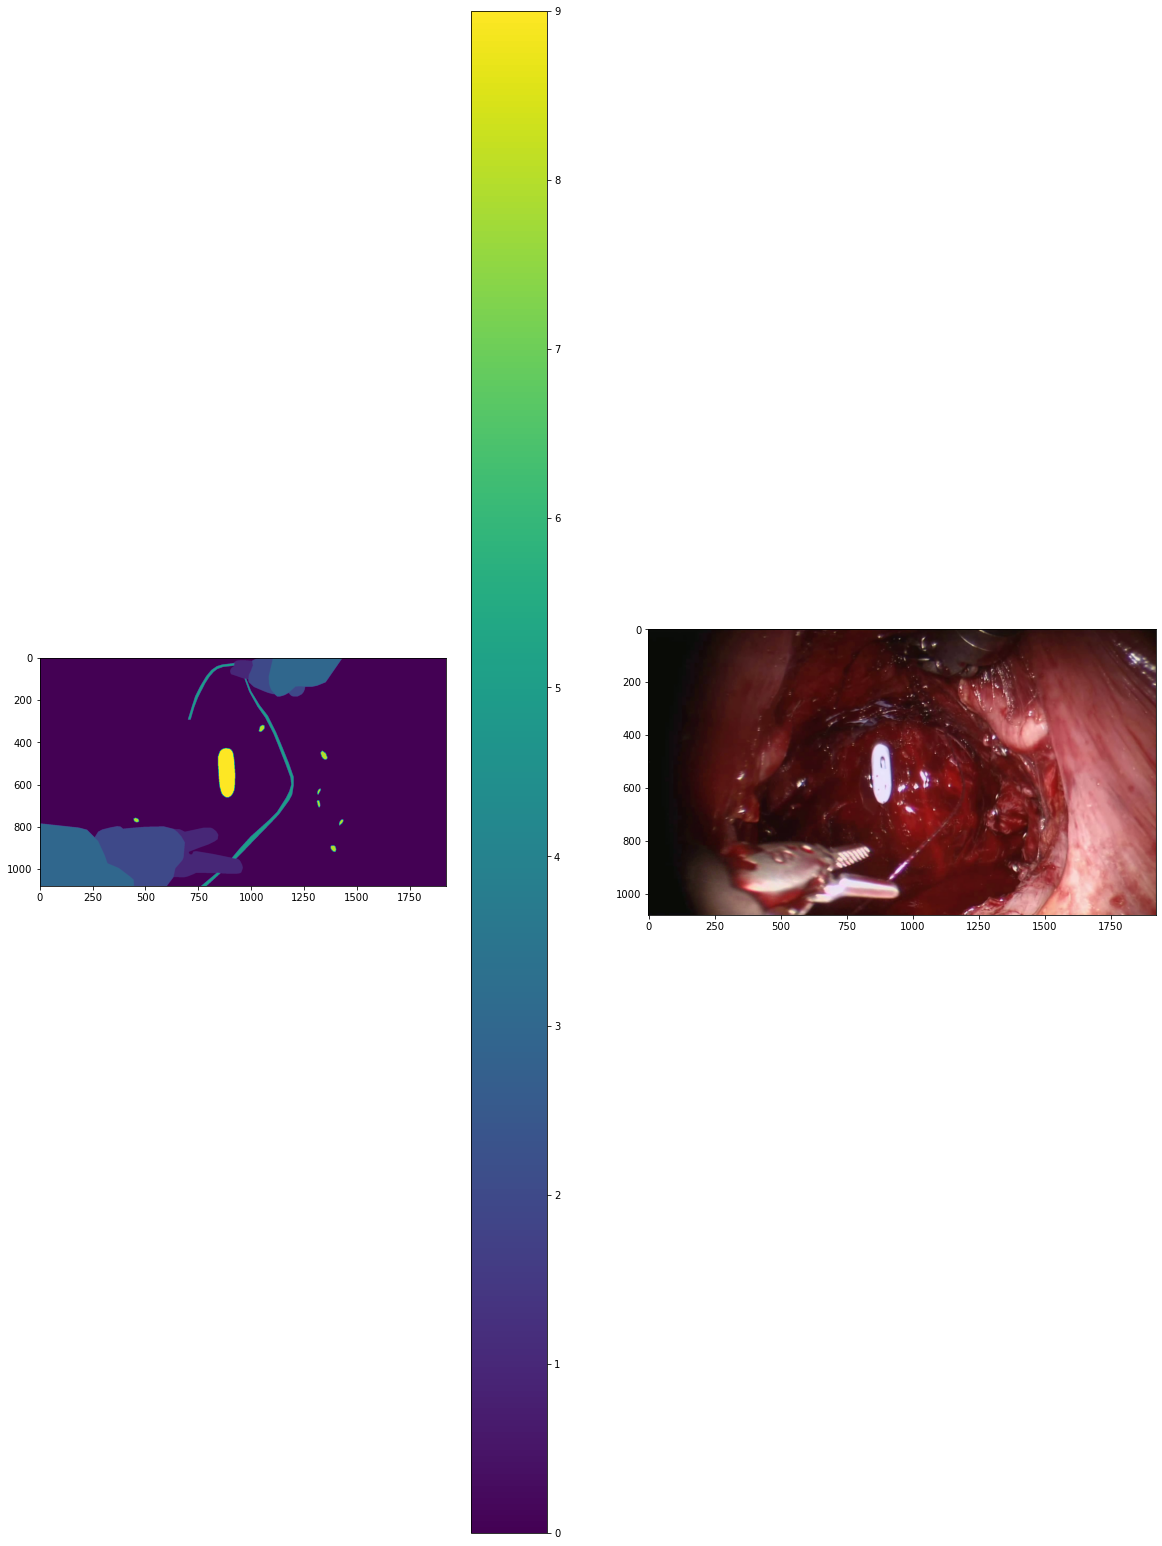

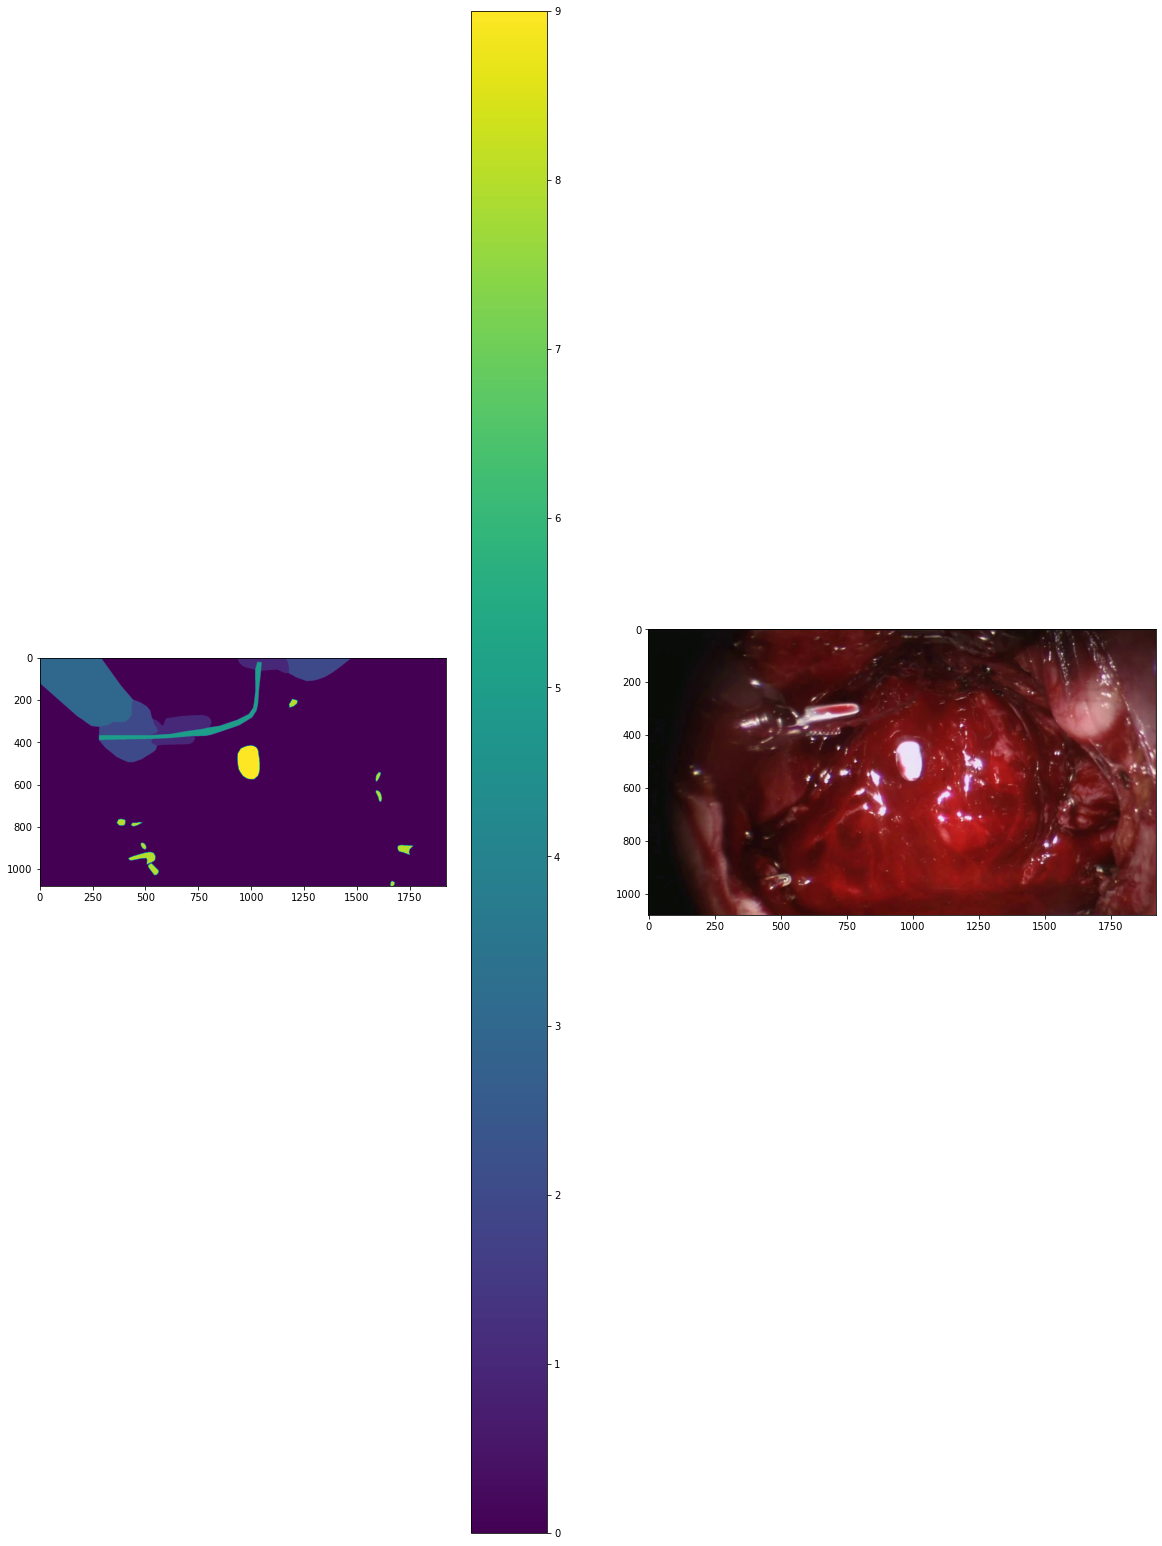

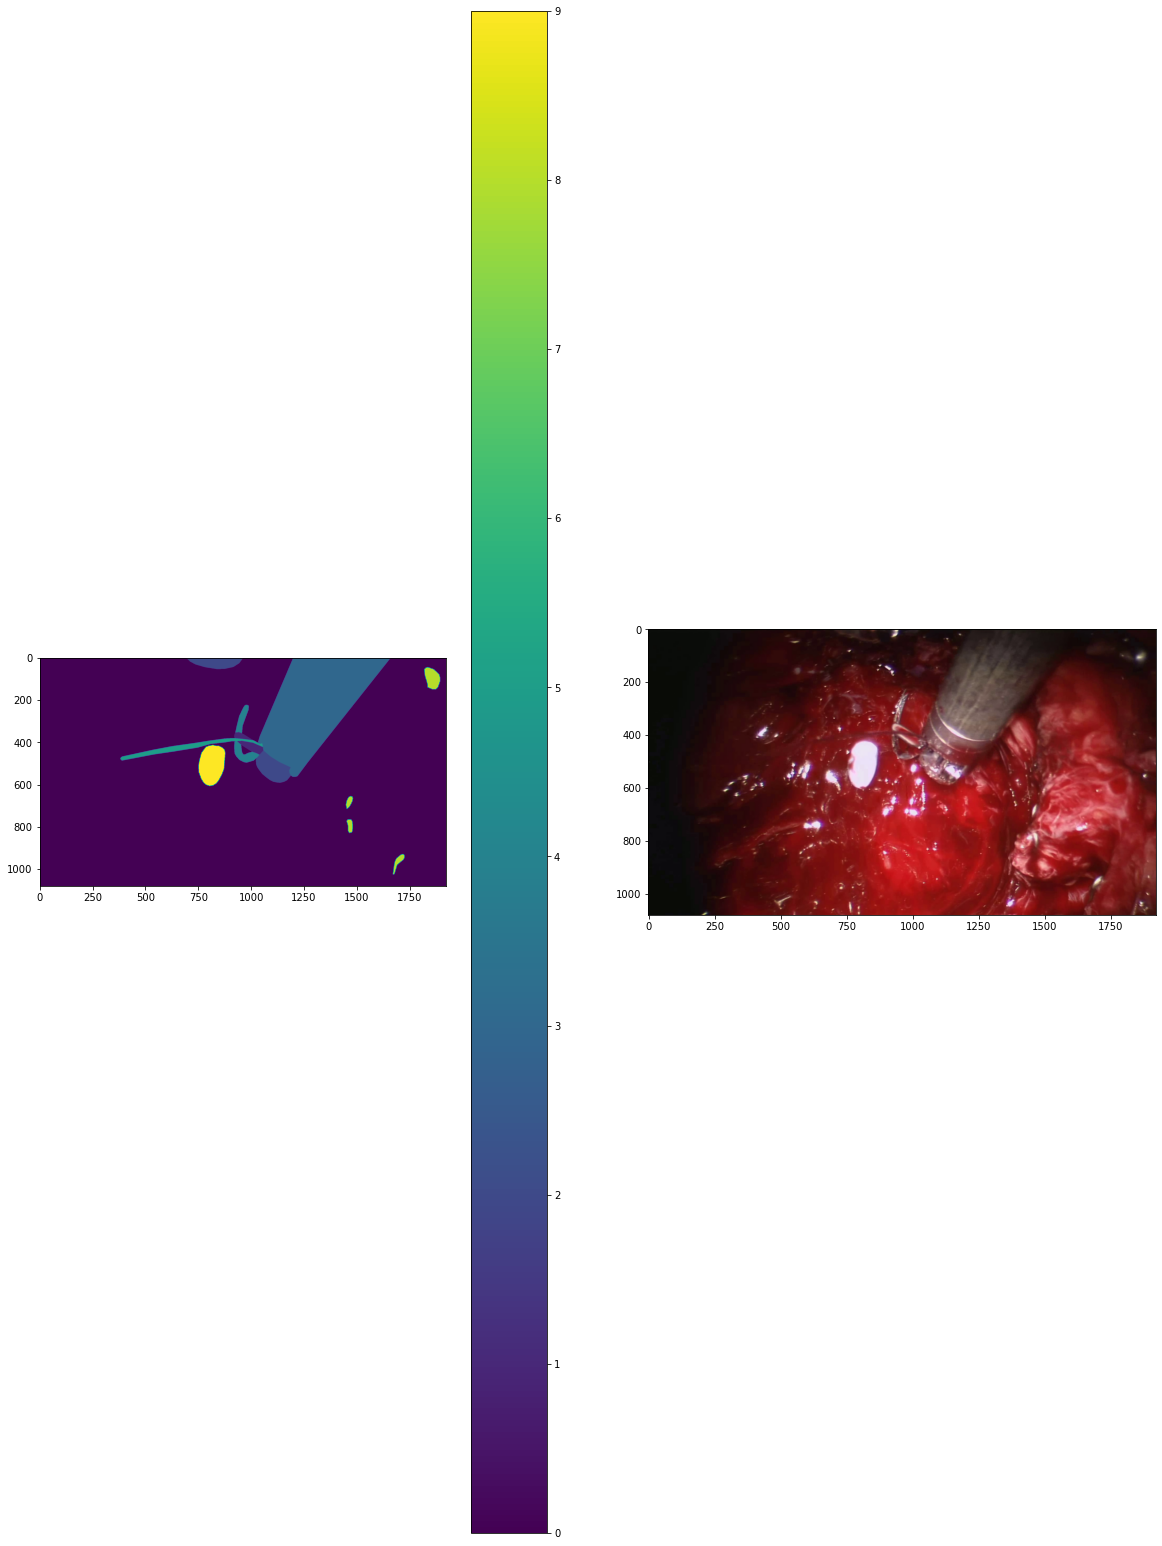

In [10]:
for i in range(10):
    mask_path = mask_paths[i]
    img_path=path_change(mask_path)
    mask = cv2.imread(mask_path)[:, :, 0]
    img = cv2.imread(img_path)[:, :, ::-1]
    plt.figure(figsize=(20,40))
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.show()
# mask.shape